# Visualize Sample X-Rays

In [ ]:
!bash drive/My\ Drive/datawithcred.sh

 99% 2.28G/2.29G [00:20<00:00, 146MB/s]
100% 2.29G/2.29G [00:20<00:00, 118MB/s]
Cloning into 'MSc-Project'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 822 (delta 129), reused 114 (delta 69), pack-reused 647
Receiving objects: 100% (822/822), 12.77 MiB | 33.35 MiB/s, done.
Resolving deltas: 100% (457/457), done.


In [ ]:
from pathlib import Path
import tensorflow as tf
import numpy as np
import seaborn as sns
from src.data.make_dataset import GetDataset
from src.utils import visualize_augmented_images
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Generating Augmented Image Samples

In [ ]:
image = tf.io.read_file("chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg")
image=tf.image.decode_jpeg(image ,channels=3)

In [ ]:
dt = GetDataset((250, 250))

In [ ]:
rotate90 = dt.image_rot90(image)

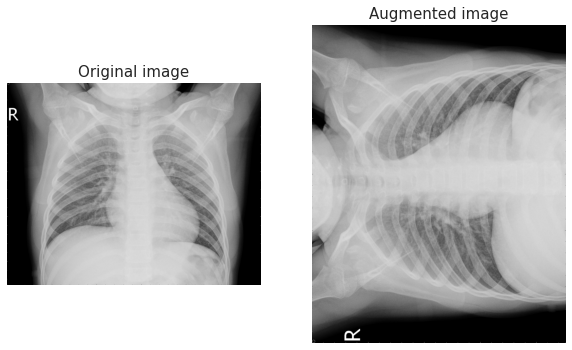

In [ ]:
visualize_augmented_images(image, rotate90)

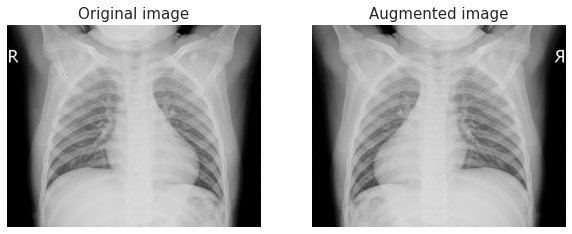

In [ ]:
leftflip = dt.image_flip_left_right(image)
visualize_augmented_images(image, leftflip)

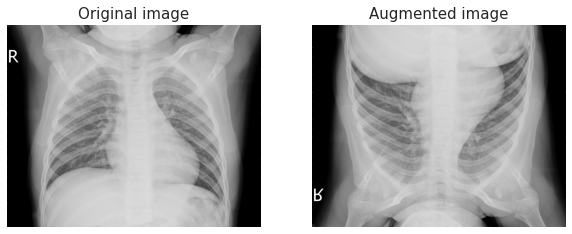

In [ ]:
flipdown = dt.image_flip_up_down(image)
visualize_augmented_images(image, flipdown)

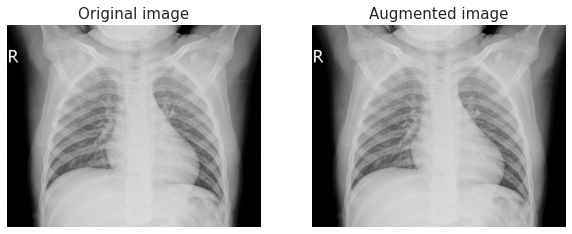

In [ ]:
saturated = dt.image_adjust_saturation(image, factor=9)
visualize_augmented_images(image, saturated)

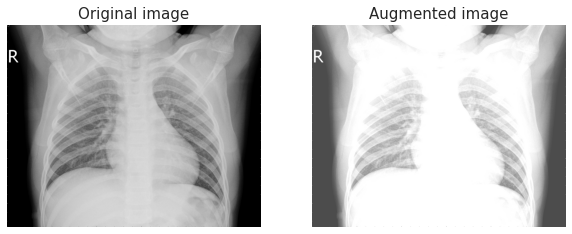

In [ ]:
bright = dt.image_adjust_brightness(image, delta=0.3)
visualize_augmented_images(image, bright)

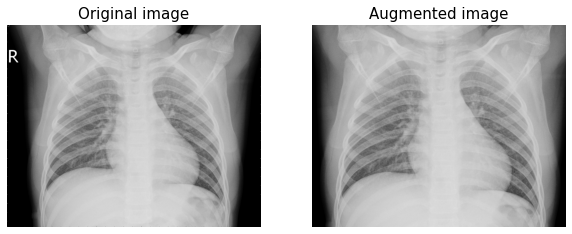

In [ ]:
cropped = dt.image_central_crop(image)
visualize_augmented_images(image, cropped)

In [ ]:
import matplotlib.pyplot as plt

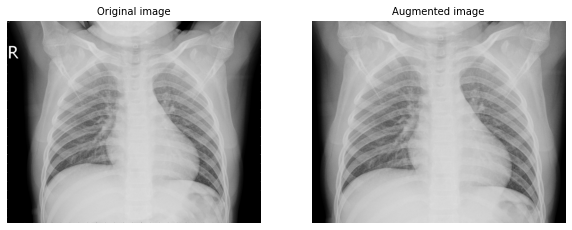

In [ ]:

fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
#[axi.set_axis_off() for axi in ax.ravel()]
plt.axis('off')
plt.title('Original image', fontsize=10)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('Augmented image', fontsize=10)
plt.axis('off')
plt.imshow(cropped)
plt.savefig("test",
            dpi=100,
            bbox_inches = 'tight',
    pad_inches = 0.1)
#plt.show()
#plt.draw()
#plt.savefig("test", dpi=100)

In [ ]:
image.numpy().shape

(1416, 1776, 3)

In [ ]:
train = Path("chest_xray/chest_xray/train/")
test_d = {}
for p in train.glob("*/*.jpeg"):
    #print(p)
    image = tf.io.read_file(str(p))
    image = tf.image.decode_jpeg(image)
    #print(image.numpy().shape[0])
    test_d[str(p)] = image.numpy().shape

In [ ]:
heights = [i[0] for i in test_d.values()]
widths = [i[1] for i in test_d.values()]

In [ ]:
print("Mean height of images:{}".format(np.mean(heights)))
print("Mean width of images:{}".format(np.mean(widths)))

Mean height of images:968.0747699386503
Mean width of images:1320.6108128834355


## Graph of the Image Dimensions

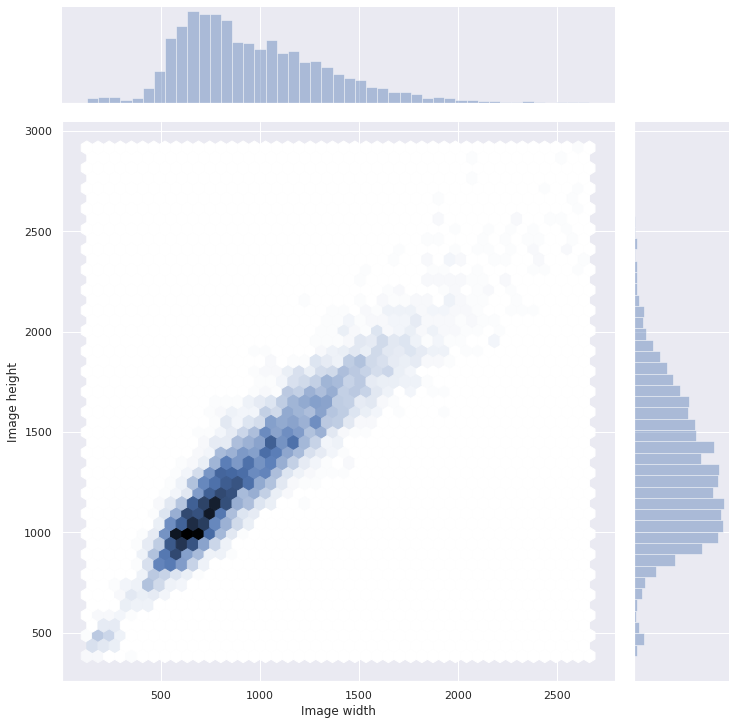

In [ ]:
graph = sns.jointplot(heights, widths, kind="hex", height=10) #.set_title("Original Image dimensions")
graph.set_axis_labels(xlabel="Image width", ylabel="Image height")
graph.savefig("image_dims_density.png")

In [ ]:
def get_min_dimention(path_dir):
    global_dim = 10000
    global_file = dict()
    files_path = Path(path_dir).glob("*/*.jpeg")
    for p in files_path:
        image = tf.io.read_file(str(p))
        image = tf.image.decode_jpeg(image)
        min_dim = min(
            image.numpy().shape[0],
            image.numpy().shape[1]
        )
        global_file[str(p)] = min_dim
        #global_file["path"] = str(p)
        if min_dim < global_dim:
            global_file = p
            global_dim = min_dim
    return global_dim, global_file

In [ ]:
#get_min_dimention("chest_xray/chest_xray/train/")

In [ ]:
#get_min_dimention("chest_xray/chest_xray/val/")

In [ ]:
#get_min_dimention("chest_xray/chest_xray/test/")

## Calculating Number of Images in Each Folder

In [ ]:
no_train = len([i for i in Path("chest_xray/chest_xray/train/").glob("*/*.jpeg")])
no_train_pnu = len([i for i in Path("chest_xray/chest_xray/train/PNEUMONIA/").glob("*.jpeg")])
no_train_no = len([i for i in Path("chest_xray/chest_xray/train/NORMAL/").glob("*.jpeg")])
print(no_train, no_train_pnu, no_train_no)

5216 3875 1341


In [ ]:
no_val = len([i for i in Path("chest_xray/chest_xray/val/").glob("*/*.jpeg")])
no_val_pnu = len([i for i in Path("chest_xray/chest_xray/val/PNEUMONIA/").glob("*.jpeg")])
no_val_no = len([i for i in Path("chest_xray/chest_xray/val/NORMAL/").glob("*.jpeg")])
print(no_val, no_val_pnu, no_val_no)

16 8 8


In [ ]:
no_test = len([i for i in Path("chest_xray/chest_xray/test/").glob("*/*.jpeg")])
no_test_pnu = len([i for i in Path("chest_xray/chest_xray/test/PNEUMONIA/").glob("*.jpeg")])
no_test_no = len([i for i in Path("chest_xray/chest_xray/test/NORMAL/").glob("*.jpeg")])
print(no_test, no_test_pnu, no_test_no)

624 390 234
